In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

In [2]:
# Read in the image 

img = cv2.imread("img/pizza.jpg")

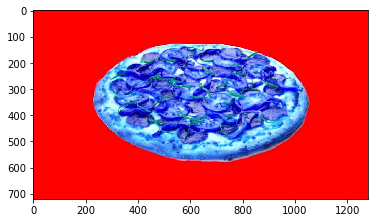

In [3]:
plt.imshow(img)

Wait!!!! `cv2` reads in the images in BGR format. So, a color conversion is required

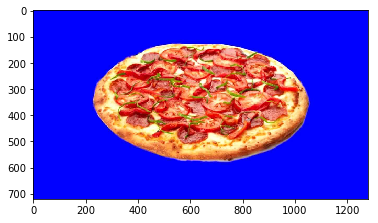

In [4]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
print("The image is ",type(img)," with dimensions ",img.shape)

The image is  <class 'numpy.ndarray'>  with dimensions  (720, 1280, 3)


In [5]:
# Define the blue thresholds

lower_blue = np.array([0,0,220])
upper_blue = np.array([50,50,255])

In [6]:
img_copy = np.copy(img)

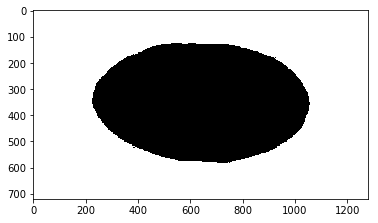

In [7]:
# Define a mask over the blue background

mask = cv2.inRange(img_copy,lower_blue,upper_blue)
plt.imshow(mask,cmap='gray')

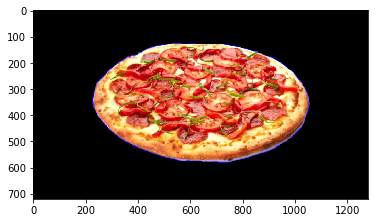

In [9]:
# Create masked image blacking out the background

masked_img = np.copy(img_copy)
masked_img[mask!=0] = [0,0,0]

plt.imshow(masked_img)

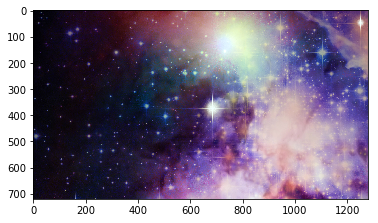

In [17]:
# The background image 

background_img = cv2.imread("img/space.jpg")
background_img = cv2.cvtColor(background_img,cv2.COLOR_BGR2RGB)

# Crop the background image so that it's dimensions equal that of the original image

crop_background = background_img[0:720,0:1280]
plt.imshow(crop_background)

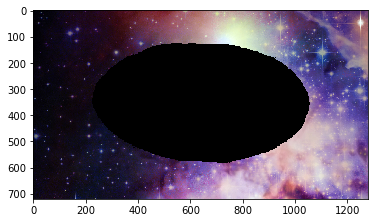

In [18]:
# Black out the pizza area in the background image

crop_background[mask==0] = [0,0,0]
plt.imshow(crop_background)

In [19]:
# Final image

final_img = masked_img+crop_background

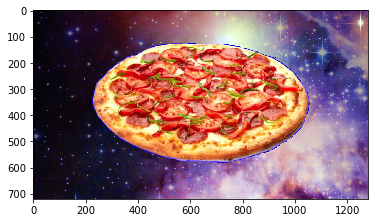

In [20]:
plt.imshow(final_img)